In [1]:
import pandas as pd
%matplotlib inline
import requests
import json
import demjson
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot as plt
from weather import Weather

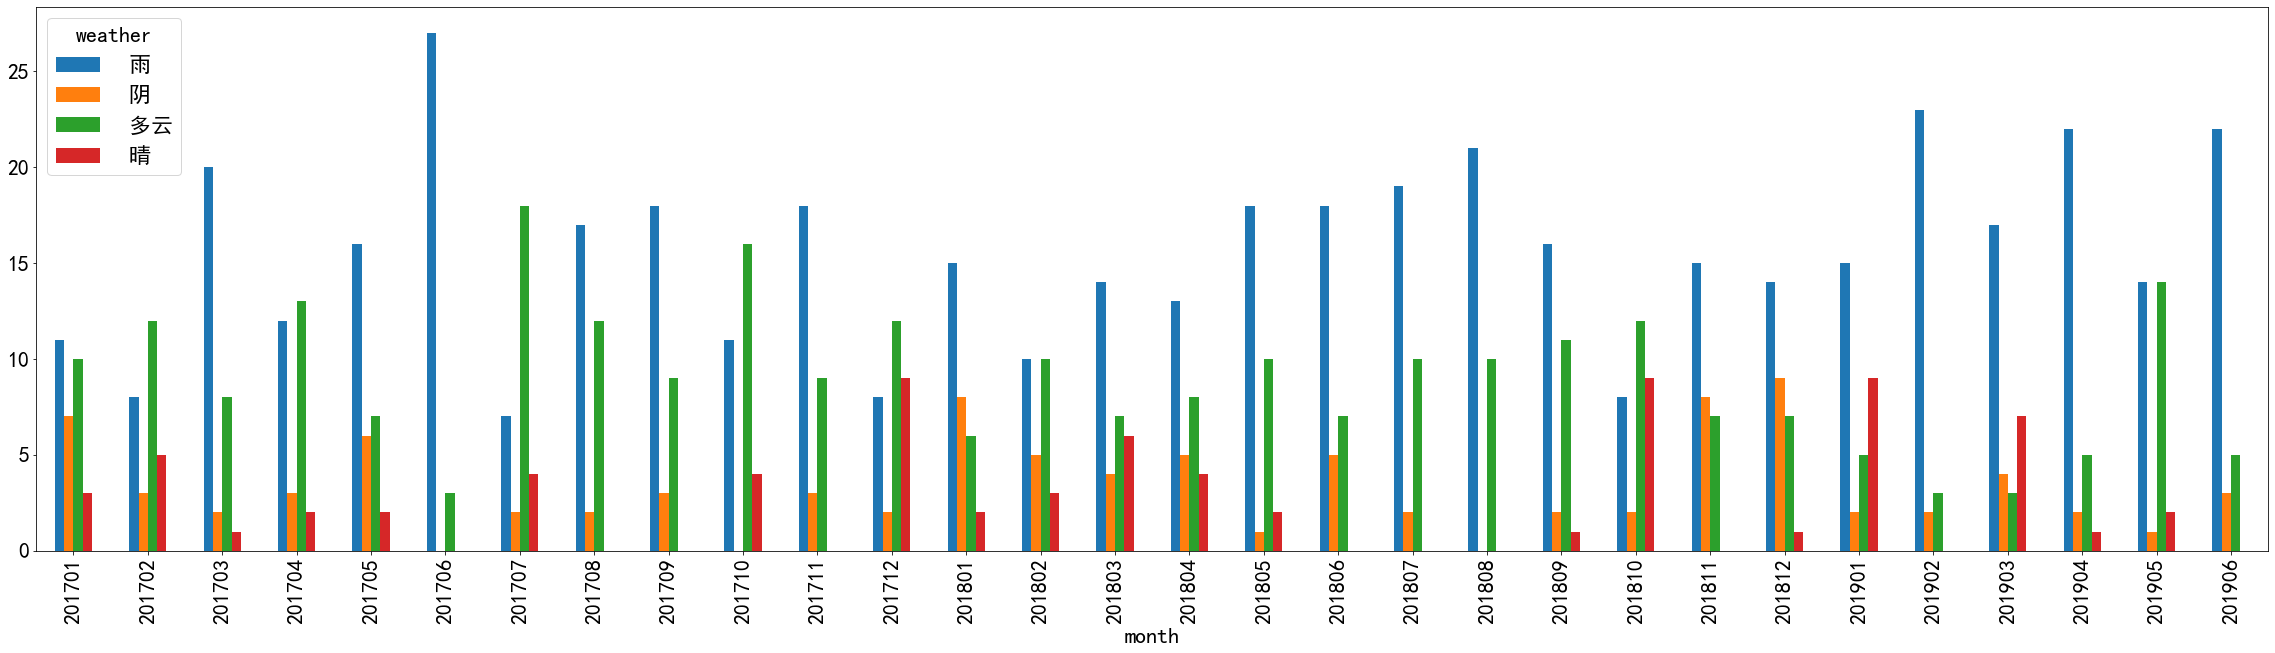

In [4]:
Weather('温州').plot_weather('201701', '201906')

In [8]:
date = '201905'
weather = requests.get('http://tianqi.2345.com/t/wea_history/js/{date}/59493_{date}.js'.format(date=date)).text.split('=')[1][:-1]
weather = demjson.decode(weather)['tqInfo']
pd.DataFrame(weather)
               

,aqi,aqiInfo,aqiLevel,bWendu,fengli,fengxiang,tianqi,yWendu,ymd
0,40,优,1,28℃,2级,东北风,阴,22℃,2019-05-01
1,37,优,1,27℃,2级,东北风,多云,21℃,2019-05-02
2,41,优,1,27℃,2级,东北风,多云,21℃,2019-05-03
3,38,优,1,26℃,3级,东南风,小雨,21℃,2019-05-04
4,34,优,1,22℃,3级,东北风,暴雨~大雨,19℃,2019-05-05
5,24,优,1,24℃,2级,东北风,雷阵雨~大雨,19℃,2019-05-06
6,24,优,1,23℃,3级,东北风,中雨~小雨,18℃,2019-05-07
7,29,优,1,22℃,2级,东北风,大暴雨~大雨,20℃,2019-05-08
8,28,优,1,24℃,2级,东北风,小雨~多云,20℃,2019-05-09
9,41,优,1,27℃,2级,东南风,多云,21℃,2019-05-10


In [5]:
def read_weather(start, end):
    dates = date_generate(start, end)
    return pd.concat(map(get_weather, dates))
def get_weather(date):
    weather = requests.get('http://tianqi.2345.com/t/wea_history/js/{date}/59493_{date}.js'.format(date=date)).text.split('=')[1][:-1]
    weather = demjson.decode(weather)['tqInfo']
    weather = json.dumps(weather)
    df = pd.read_json(weather, orient='records')
    df['month'] = date
    return df
               

In [6]:
get_weather(201801)

,aqi,aqiInfo,aqiLevel,bWendu,fengli,fengxiang,tianqi,yWendu,ymd,month
0,97.0,良,2.0,21℃,微风,无持续风向,多云,14℃,2018-01-01,201801
1,89.0,良,2.0,21℃,微风,无持续风向,多云,16℃,2018-01-02,201801
2,58.0,良,2.0,22℃,微风,无持续风向,多云~小雨,16℃,2018-01-03,201801
3,50.0,优,1.0,22℃,微风,无持续风向,阴~小雨,17℃,2018-01-04,201801
4,51.0,良,2.0,19℃,微风,无持续风向,阴~小雨,15℃,2018-01-05,201801
5,38.0,优,1.0,18℃,微风,无持续风向,阵雨,16℃,2018-01-06,201801
6,19.0,优,1.0,16℃,4-5级,东风,小到中雨~小雨,9℃,2018-01-07,201801
7,22.0,优,1.0,18℃,微风,无持续风向,小雨~阵雨,7℃,2018-01-08,201801
8,52.0,良,2.0,8℃,3-4级,北风,小雨,6℃,2018-01-09,201801
9,46.0,优,1.0,12℃,3-4级,东北风,多云,8℃,2018-01-10,201801


In [4]:
def date_generate(start, end):
    start = datetime.strptime(start, '%Y%m')
    end = datetime.strptime(end, '%Y%m')
    while True:
        next_start = start + relativedelta(months=1)
        yield start.strftime('%Y%m')
        if next_start > end:
            break
        start = next_start


In [5]:
df = read_weather('201801', '201812')
df

,aqi,aqiInfo,aqiLevel,bWendu,fengli,fengxiang,tianqi,yWendu,ymd,month
0,97.0,良,2.0,21℃,微风,无持续风向,多云,14℃,2018-01-01,201801
1,89.0,良,2.0,21℃,微风,无持续风向,多云,16℃,2018-01-02,201801
2,58.0,良,2.0,22℃,微风,无持续风向,多云~小雨,16℃,2018-01-03,201801
3,50.0,优,1.0,22℃,微风,无持续风向,阴~小雨,17℃,2018-01-04,201801
4,51.0,良,2.0,19℃,微风,无持续风向,阴~小雨,15℃,2018-01-05,201801
5,38.0,优,1.0,18℃,微风,无持续风向,阵雨,16℃,2018-01-06,201801
6,19.0,优,1.0,16℃,4-5级,东风,小到中雨~小雨,9℃,2018-01-07,201801
7,22.0,优,1.0,18℃,微风,无持续风向,小雨~阵雨,7℃,2018-01-08,201801
8,52.0,良,2.0,8℃,3-4级,北风,小雨,6℃,2018-01-09,201801
9,46.0,优,1.0,12℃,3-4级,东北风,多云,8℃,2018-01-10,201801


In [18]:
rain = '雨'
rain_index = ' ' + rain
cloudy = '多云'
cloudy_index = ' ' + cloudy
overcast = '阴'
overcast_index = ' ' + overcast
sunny = '晴'
sunny_index = ' ' + sunny
def weath_categoty(row):
    tianqi = row['tianqi']
    if tianqi.find(rain) != -1:
        return rain_index
    if tianqi.find(overcast) != -1:
        return overcast_index
    if tianqi.find(cloudy) != -1:
        return cloudy_index
    return sunny_index


In [30]:
def save_weather(start, end, city):
    df = read_weather(start, end).dropna().reset_index()
    df.to_csv('./resources/weather/{}.csv'.format(city))
def plot_weather(start, end):
    df = read_weather(start, end).dropna().reset_index()
    df['weather'] = df.apply(weath_categoty, axis=1)
    
    from pylab import rcParams
    rcParams['figure.figsize'] = 40, 10
    weather_df = df.groupby(['month', 'weather']).aqi.count().unstack().reset_index()
    weather_df.plot.bar(x='month', y=[rain_index, overcast_index, cloudy_index, sunny_index])

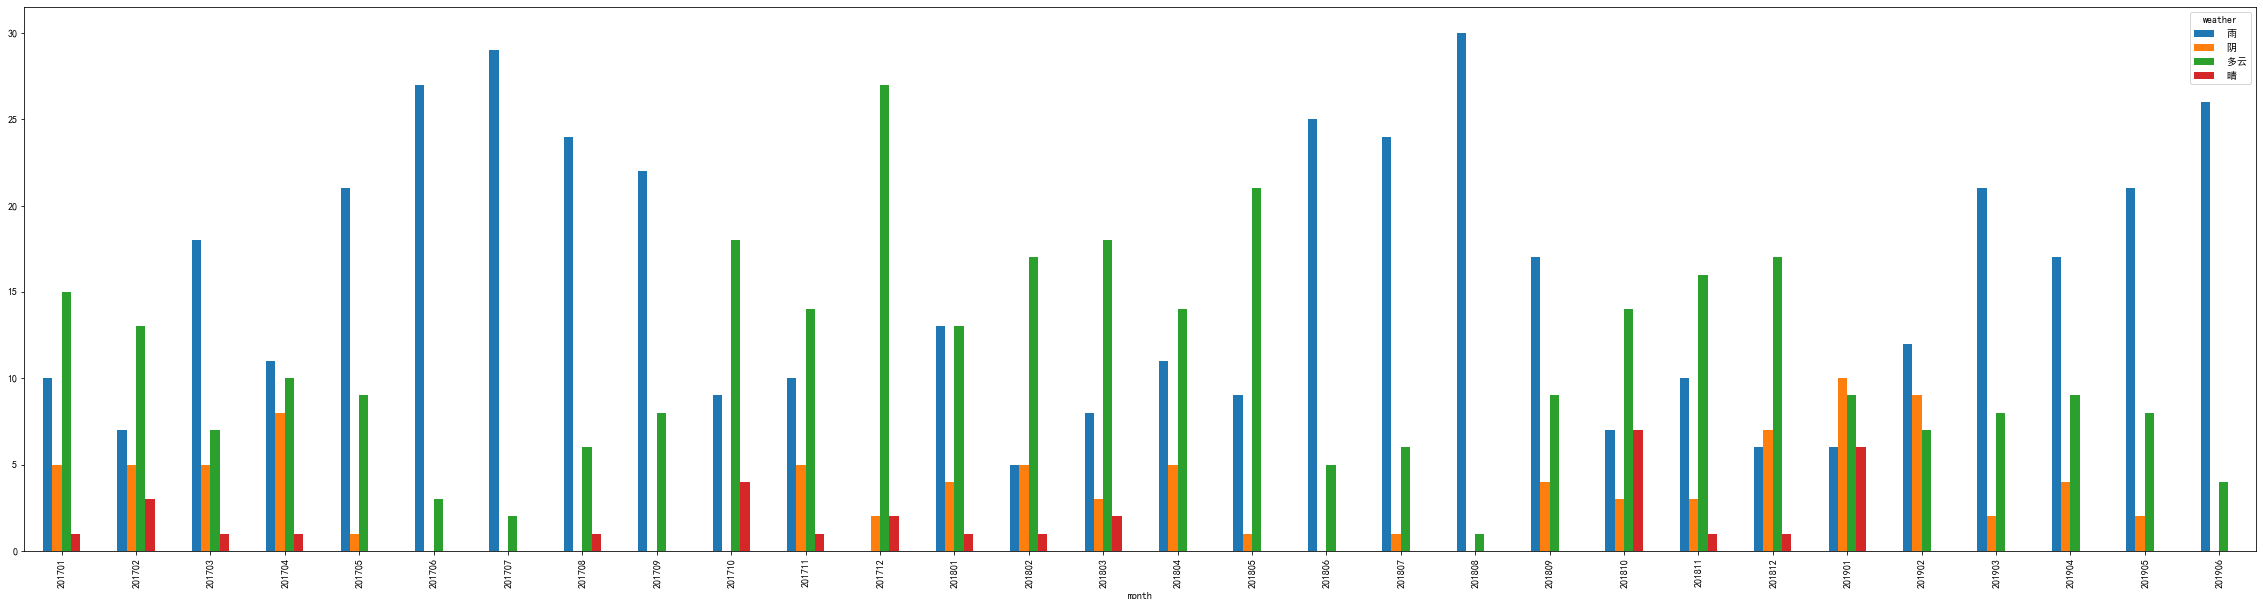

In [31]:
plot_weather('201701', '201906')

In [21]:
df = df.dropna().reset_index()
df['weather'] = df.dropna().apply(weath_categoty, axis=1)

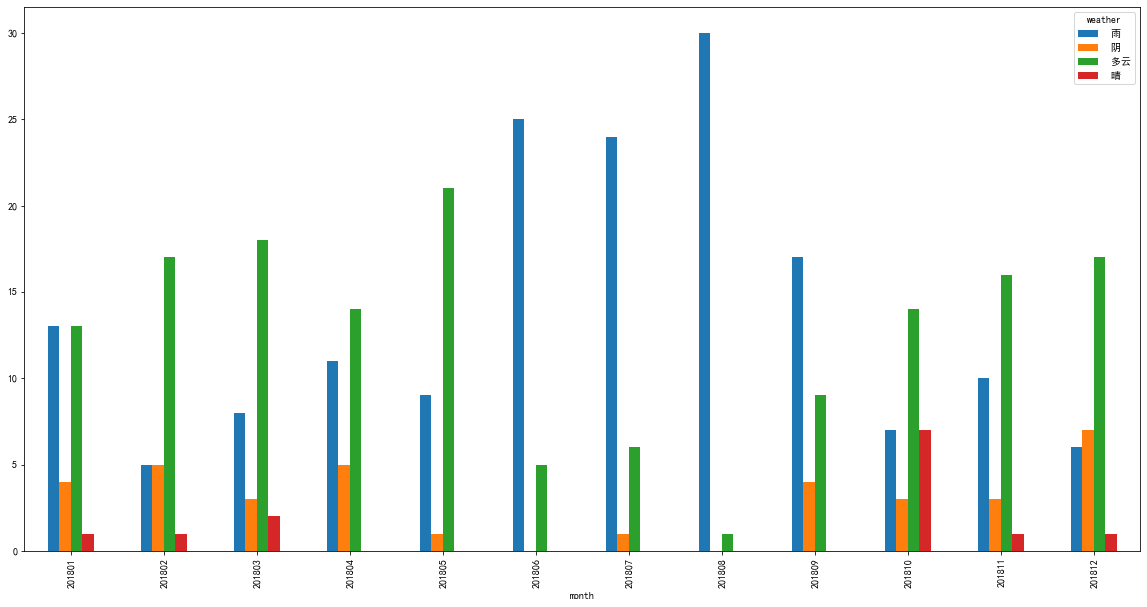

In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
weather_df = df.groupby(['month', 'weather']).aqi.count().unstack().reset_index()
weather_df.plot.bar(x='month', y=[rain_index, overcast_index, cloudy_index, sunny_index])